In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import os

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# **Importing test data**

In [44]:
test = pd.read_csv('./data/test.csv')

In [45]:
xtest, ytest = test.drop('charges', axis=1), test[['charges']]

In [46]:
model_original = joblib.load('data/models/best_model_original.pkl')
model_log = joblib.load('data/models/best_model_log.pkl')
model_smokers = joblib.load('data/models/best_model_smokers.pkl')
model_smokers_squared = joblib.load('data/models/best_model_smokers_squared.pkl')

In [47]:
predictions_original = model_original.predict(xtest)
predictions_log = np.exp(model_log.predict(xtest))
predictions_smokers = model_smokers.predict(xtest)
predictions_smokers_squared = np.pow(model_smokers_squared.predict(xtest), 2)

In [48]:
rmse_original = root_mean_squared_error(ytest, predictions_original)
mae_original = mean_absolute_error(ytest, predictions_original)
print(f"RMSE: {rmse_original}")
print(f"MAE: {mae_original}")

RMSE: 4271.3615673287595
MAE: 2378.792094330748


<function matplotlib.pyplot.show(close=None, block=None)>

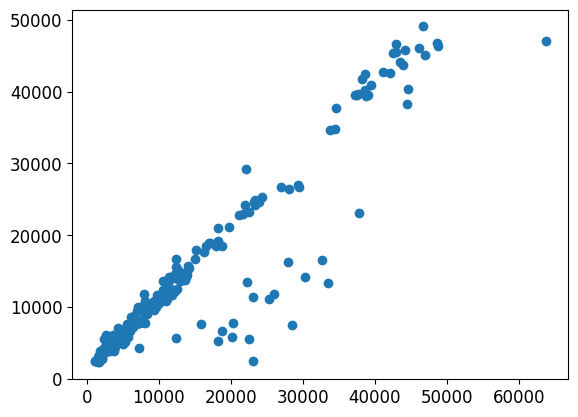

In [49]:
plt.plot(ytest, predictions_original, 'o')
plt.show

In [57]:
rmse_log = root_mean_squared_error(ytest, predictions_log)
mae_log = mean_absolute_error(ytest, predictions_log)
print(f"RMSE: {rmse_log}")
print(f"MAE: {mae_log}")

RMSE: 4399.804258414521
MAE: 1952.1872365342817


<function matplotlib.pyplot.show(close=None, block=None)>

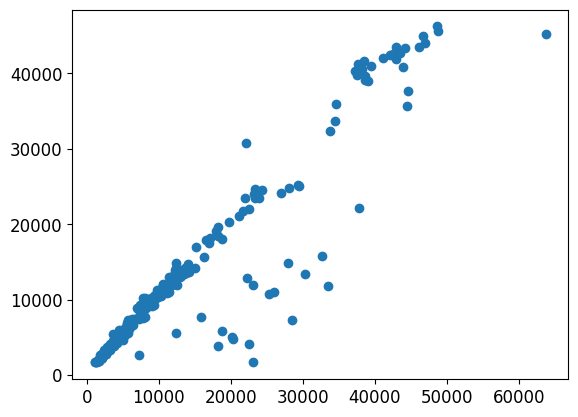

In [56]:
plt.plot(ytest, predictions_log, 'o')
plt.show

In [52]:
rmse_smokers = root_mean_squared_error(ytest, predictions_smokers)
mae_smokers = mean_absolute_error(ytest, predictions_smokers)
print(f"RMSE: {rmse_smokers}")
print(f"MAE: {mae_smokers}")

RMSE: 4567.515417252636
MAE: 2628.3545745815936


<function matplotlib.pyplot.show(close=None, block=None)>

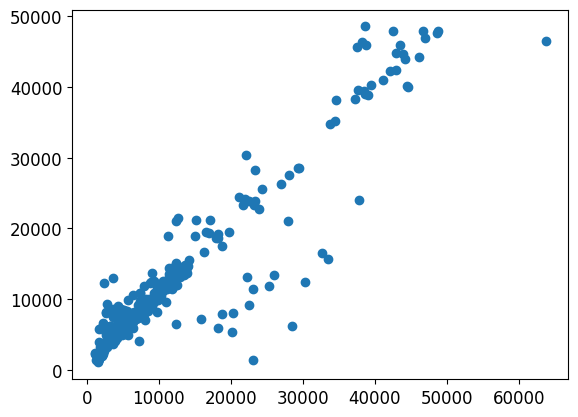

In [53]:
plt.plot(ytest, predictions_smokers, 'o')
plt.show

In [54]:
rmse_smokers_squared = root_mean_squared_error(ytest, predictions_smokers_squared)
mae_smokers_squared = mean_absolute_error(ytest, predictions_smokers_squared)
print(f"RMSE: {rmse_smokers_squared}")
print(f"MAE: {mae_smokers_squared}")

RMSE: 4226.588349016118
MAE: 2191.8666011216474


<function matplotlib.pyplot.show(close=None, block=None)>

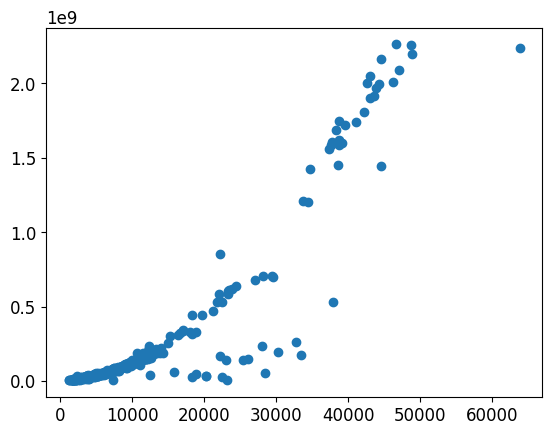

In [ ]:
plt.plot(ytest, predictions_smokers_squared, 'o')
plt.show